error: No virtual environment found; run `uv venv` to create an environment, or pass `--system` to install into a non-virtual environment
error: No virtual environment found; run `uv venv` to create an environment, or pass `--system` to install into a non-virtual environment


Matplotlib is building the font cache; this may take a moment.


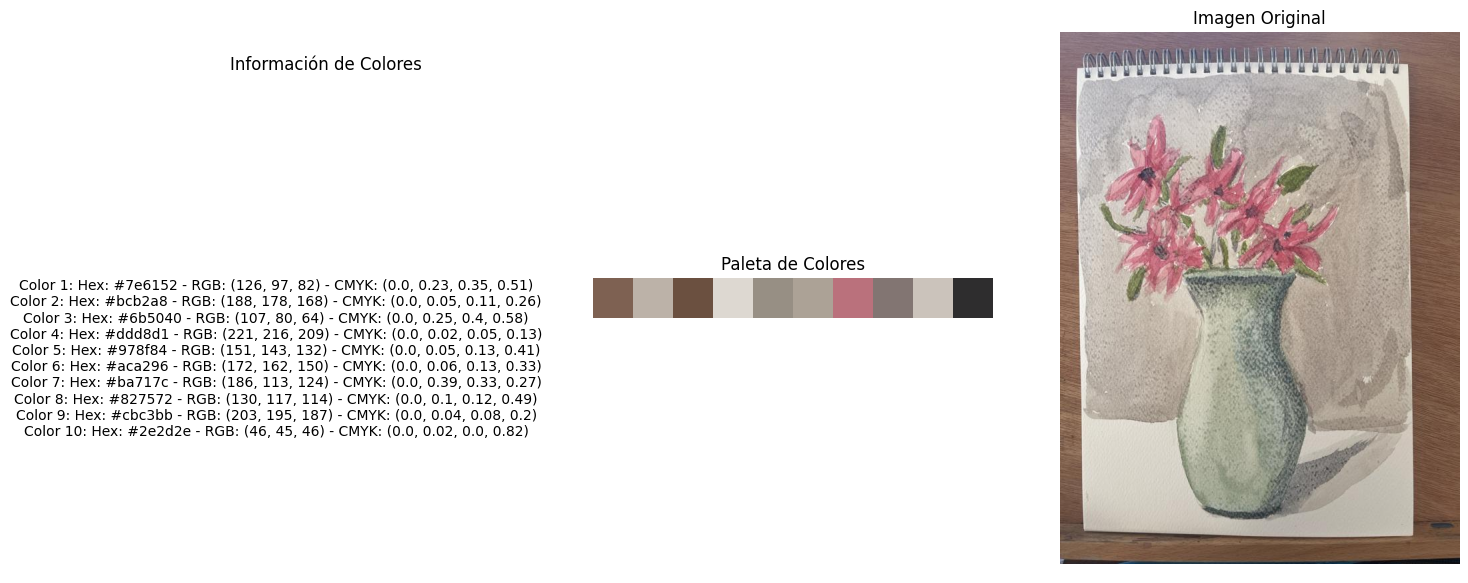

In [5]:
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to calculate CMYK values from RGB values
# Función para calcular los valores CMYK a partir de los valores RGB
def rgb_to_cmyk(rgb):
    r, g, b = [x / 255.0 for x in rgb]
    k = 1 - max(r, g, b)
    c = (1 - r - k) / (1 - k) if (1 - k) != 0 else 0
    m = (1 - g - k) / (1 - k) if (1 - k) != 0 else 0
    y = (1 - b - k) / (1 - k) if (1 - k) != 0 else 0
    return (round(c, 2), round(m, 2), round(y, 2), round(k, 2))

# Load the image (Cargar la imagen)
img = Image.open("/Users/josh/Github/site/python/tests/colour_filter/input/03598547cb.jpg")
image = np.array(img)

# Get the dimensions of the image (Obtener las dimensiones de la imagen)
w, h, d = image.shape

# Flatten the pixel matrix (Aplanar la matriz de píxeles)
pixels = image.reshape((w * h, d))

# Number of colors to extract (Número de colores a extraer)
n_colors = 10

# Fit the KMeans model (Ajustar el modelo KMeans)
model = KMeans(n_clusters=n_colors, random_state=42).fit(pixels)

# Get the colors in the palette in hexadecimal and RGB format (Obtener los colores de la paleta en formato hexadecimal y RGB)
palette_hex = ['#%02x%02x%02x' % tuple(map(int, color)) for color in model.cluster_centers_]
palette_rgb = [tuple(map(int, color)) for color in model.cluster_centers_]

# Calculate CMYK values (Calcular los valores CMYK)
palette_cmyk = [rgb_to_cmyk(rgb) for rgb in palette_rgb]

# Display the original image, the color palette, and color information in one panel (Mostrar la imagen original, la paleta de colores y la información de colores en un solo panel)
plt.figure(figsize=(15, 6))

# Panel 1: Original Image (Panel 1: Imagen Original)
plt.subplot(1, 3, 3)
plt.title("Imagen Original")
plt.axis('off')
plt.imshow(image)

# Panel 2: Color Palette (Panel 2: Paleta de Colores)
plt.subplot(1, 3, 2)
plt.title("Paleta de Colores")
plt.axis('off')
color_palette = np.array([palette_rgb], dtype=np.uint8)
plt.imshow(color_palette)

# Panel 3: Color Information (RGB, Hex, CMYK) (Panel 3: Información de Colores (RGB, Hexadecimal, CMYK))
plt.subplot(1, 3, 1)
plt.title("Información de Colores", y=0.9)
plt.axis('off')
color_info = ""
for i, (hex_color, rgb_color, cmyk_color) in enumerate(zip(palette_hex, palette_rgb, palette_cmyk)):
    color_info += f"Color {i+1}: Hex: {hex_color} - RGB: {rgb_color} - CMYK: {cmyk_color}\n"
plt.text(0.5 * (.25 + 0.5), 0.5 * (.25 + .5), color_info, ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()